<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/06_MachineLearning/blob/main/01_Basic/03_DealingWithMultipleDimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Dealing with Multiple Dimensions

In this course, we will learn more about how to deal with data with multiple dimensions. More dimensions mean that we have more information, but also that it will take longer to fit our model. Also, as we increase the number of dimensions, we increase the complexity of our model. Thus, it is not trivial to balance these aspects.

First, we will perform an EDA, and we will discuss how some patterns in our data may affect our classification. Also, how correlation between explicative features may end up making our model worse. 

Then, we will learn about feature selection methods, so that we reduce the dimensionality of our data, defining the set of features that improves our accuracy. 

Finally, we will learn how to visualize our result from a multi-dimensional dataset.

Thus, this course we follow the entire workflow for the building of a Machine Learning classification model using high-dimensional data. However, our focus will be on the pre-processing of this data, showing how to deal with multi-dimensional datasets.

Here, we will work with a dataset from a hospital, with information about different patients. Then, we want to predict if a patient has malign or benign cancer based on that information. For that end, we will use the following packages:

In [239]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import confusion_matrix

Let's start by importing our dataset:

In [134]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')

Let's see how many entries and features we have:

In [135]:
df.shape

(569, 35)

So, here, we have information about 569 entries and 35 features. Thus, we have few entries, but a lot of features. Let's understand about these features:

In [136]:
df.head( )

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [137]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

We see that we have information about:

*   The patient's id;
*   Whether the diagnosys was malign (M) or benign (B);
*   The results for 33 different exams.

First, let's perform a basic data cleaning. First, exam 33 column has a lot of null values. In fact, only 150 entries are non-null. Also, it is the only column with null values:


In [138]:
df.isnull( ).sum( )

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Since we are missing a large part of our data, the best solution here is to simply remove this feature from our dataset. Also, since the id for each patient has no importance for us, we will also drop it:

In [139]:
df_0 = df.drop(['exame_33', 'id'], axis = 1)

In this course, we will do a lot of data processing. Thus, we will be creating new dataframes to carry this transformations. The index 0 in the variable name ```df_0``` shows that this is the first version.

## Creating a baseline model

Before going any further into data processing and discussion about more robust models, we will fit our data to a very simple baseline model. Then, the accuracy of this model will serve as a threshold for our final models: those should be, at least, better than the baseline.

First, let's fit a basic random forest algorithm:

In [140]:
y = df_0.diagnostico
X = df_0.drop('diagnostico', axis = 1)

SEED = 123143
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model_rndfor = RandomForestClassifier(n_estimators = 100)
model_rndfor.fit(X_train, y_train)

acc = model_rndfor.score(X_test, y_test)
print("Random Forest Accuracy: {:.2f}%".format(acc*100))

Random Forest Accuracy: 92.40%


It seems that our accuracy is very high (92.40%). Now, let's fit a very simple dummy classifier, and check its accuracy:

In [141]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)

acc = dummy_clf.score(X_test, y_test)
print("Random Forest Accuracy: {:.2f}%".format(acc*100))

Random Forest Accuracy: 66.67%


Our Dummy Classifier was able to get an accuracy of 66.67%. Thus, our initial random forest model was able to get a much better accuracy. Later, we will be able to compare the results of our model after data processing.

# Understanding our features

Let's try to understand a little more about our features. Are our features really helping us to understand whether the cancer is benign or malign? Is there a significant different in the result of a given exam to allow us to say this?

We can understand this by employing a visualization tool. Here, we will work with a violin plot. Let's see the first ten exams:

In [142]:
df_aux = pd.melt(df_0, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

In [143]:
exams_list = ['exame_1', 'exame_2', 'exame_3', 'exame_4', 'exame_5', 'exame_6', 'exame_7', 'exame_8', 'exame_9', 'exame_10']


df_aux2 = df_aux.query('exames == @exams_list')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

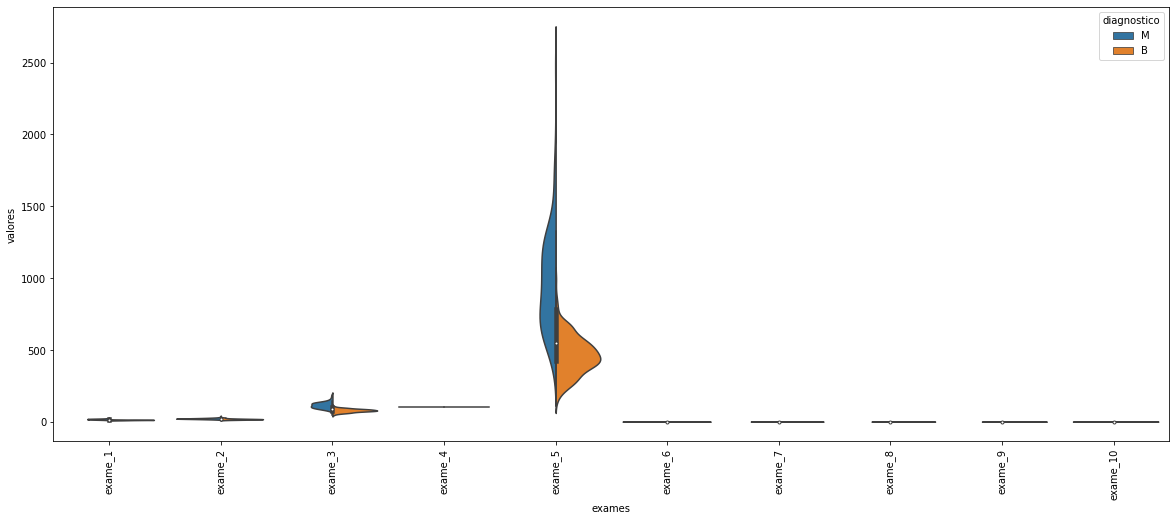

In [144]:
plt.figure(figsize = (20, 8))

sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = df_aux2, split = True)
plt.xticks(rotation = 90)

Note that, since the features are not normalized, it is hard to compare different exams in the same figure. Let's normalize our features using a standard scaler:

In [145]:
df_aux = df_0.drop('diagnostico', axis = 1)

scaler = StandardScaler( )
scaler.fit(df_aux)
df_1 = pd.DataFrame(scaler.transform(df_aux), columns = df_aux.columns).merge(df_0.diagnostico, left_index = True, right_index = True)


Great! Now, let's try to plot the violin plot again:


In [146]:
df_aux = pd.melt(df_1, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

In [147]:
exams_list = ['exame_1', 'exame_2', 'exame_3', 'exame_4', 'exame_5', 'exame_6', 'exame_7', 'exame_8', 'exame_9', 'exame_10']


df_aux2 = df_aux.query('exames == @exams_list')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

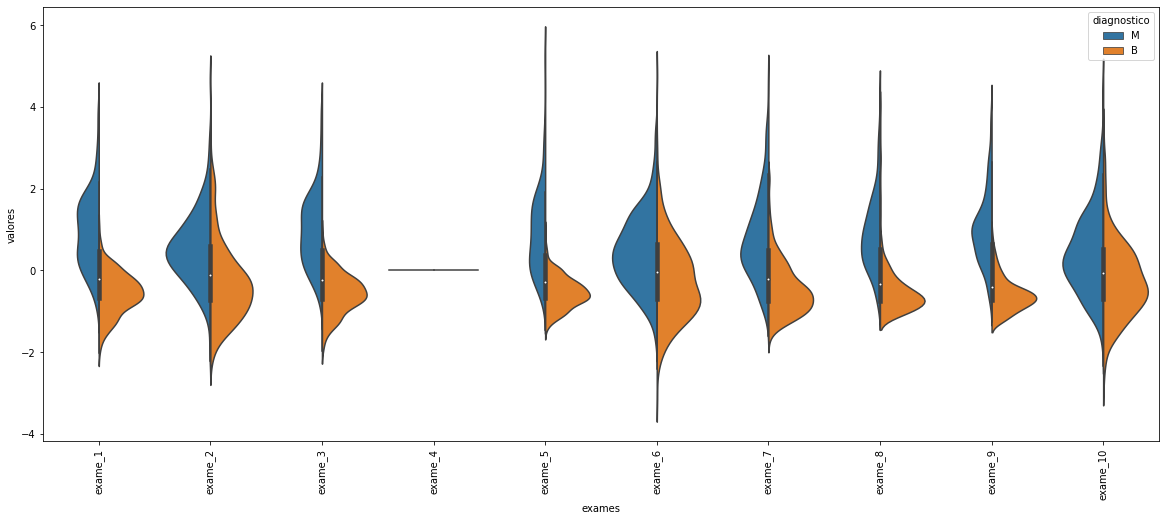

In [148]:
plt.figure(figsize = (20, 8))

sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = df_aux2, split = True)
plt.xticks(rotation = 90)

We see that, in most of the cases, there is a difference, higher or smaller, between the results of the exams. The exception is exam_4, which actually got the same result for all cases. That is strange. Let's see the figure for the rest of the exams:

In [149]:
exams_list = ['exame_11', 'exame_12', 'exame_13', 'exame_14', 'exame_15', 'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20']


df_aux2 = df_aux.query('exames == @exams_list')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

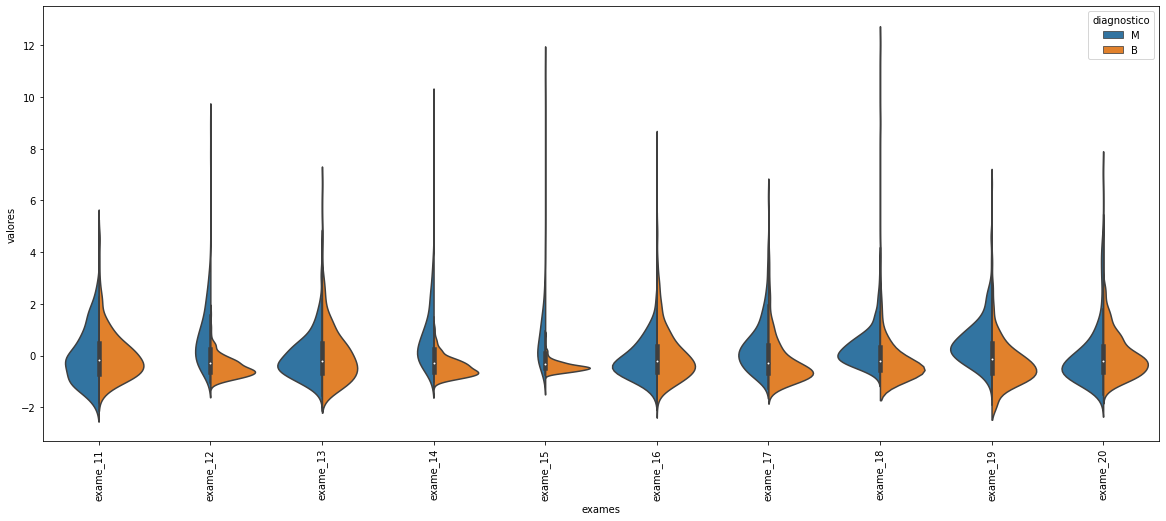

In [150]:
plt.figure(figsize = (20, 8))

sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = df_aux2, split = True)
plt.xticks(rotation = 90)

In [151]:
exams_list = ['exame_21', 'exame_22', 'exame_23', 'exame_24', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_29', 'exame_30']


df_aux2 = df_aux.query('exames == @exams_list')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

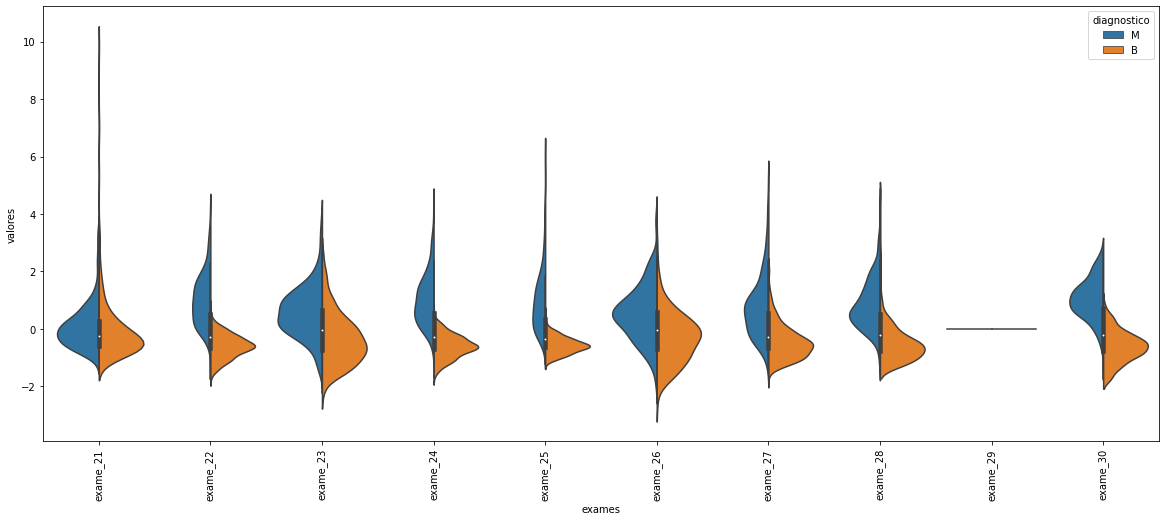

In [152]:
plt.figure(figsize = (20, 8))

sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = df_aux2, split = True)
plt.xticks(rotation = 90)

In [153]:
exams_list = ['exame_31', 'exame_32']


df_aux2 = df_aux.query('exames == @exams_list')

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

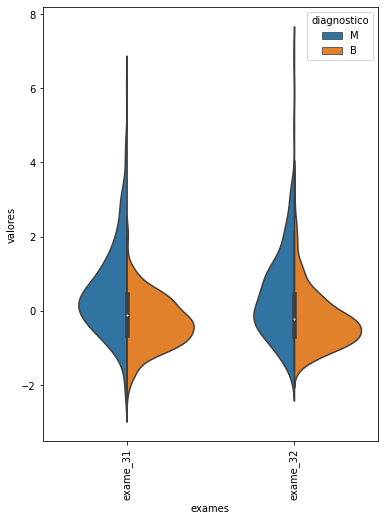

In [154]:
plt.figure(figsize = (6, 8))

sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = df_aux2, split = True)
plt.xticks(rotation = 90)

So, we see that exam 29 also has some strange results. Note that we used a standard scaler, which means that, since these features are 0, they are always equal to the average value. 

Note that, we when have a feature that has constant values, this feature is not helping us to perform our classification. Thus, it does not make sense to consider it in our dataset. Eliminating this feature will not impact our classification. Let's drop those features:

In [155]:
df_2 = df_1.drop(['exame_4', 'exame_29'], axis = 1)

Now, let's try to use our Random Forest algorithm again, and check if we were able to increase its accuracy. Since we will be repeating this process over and over, let's first create a user-defined function to repeat it:

In [156]:
def perform_classification(df, model):
  y = df.diagnostico
  X = df.drop('diagnostico', axis = 1)

  SEED = 1234
  np.random.seed(SEED)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

  model.fit(X_train, y_train)

  acc = model.score(X_test, y_test)
  print("Accuracy: {:.2f}%".format(acc*100))

Let's test it with ```df_0```, which we already now the accuracy:

In [157]:
model_rndfor = RandomForestClassifier(n_estimators = 100)
perform_classification(df_0, model_rndfor)

Accuracy: 92.40%


Nice! We got the same accuracy as before. Now, let's test the new dataset:

In [158]:
model_rndfor = RandomForestClassifier(n_estimators = 100)
perform_classification(df_2, model_rndfor)

Accuracy: 92.98%


So, we got a slightly better accuracy, but using less features. Great! Note that, here, besides eliminating some features, we also standardized our features.

# Checking for the correlation between features

Ok, we already got rid of some features with multiple null values or with constant results. Now, we still have 30 features in our dataset, and they all seem to have some information about our target.

However, how correlated are our features? Does it make sense to include exam 1 and 2 in the dataset? Are they really saying different things than only exam 1 (or 2)? We can get a better sense of this by evaluating the correlation between features. Since all of our features are continuous, we can simply use the Pearson correlation coefficient.

In [159]:
df_2.corr( )

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
exame_2,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
exame_3,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
exame_5,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
exame_6,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
exame_7,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
exame_8,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
exame_9,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
exame_10,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
exame_11,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Since we have many features, it becomes very hard to understand the correlation between features. Thus, we can try to use a heat map:

In [160]:
corr_matrix = df_2.corr( )

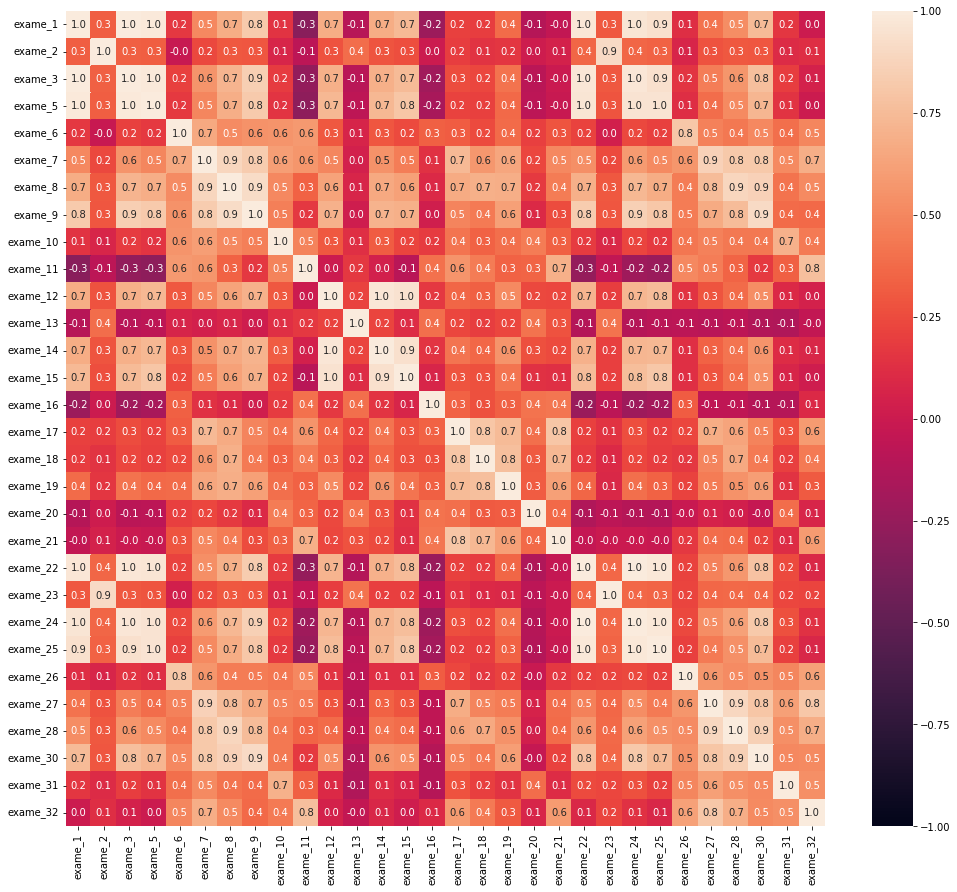

In [161]:
plt.figure(figsize = (17,15))

sns.heatmap(corr_matrix, annot = True, fmt = '.1f', vmin = -1, vmax = 1)

Note that, in the standard heat map, we can see that many features have a very high correlation with each other. However, still, it is not trivial to find which features have high correlation between each other. Let's try to automatize this.

First, let's understand which features show correlations that are higher than 0.99:

In [162]:
correlated_features = corr_matrix[corr_matrix > 0.99].sum( )

In [163]:
correlated_features[correlated_features > 1]

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Nice! Note that, here, exame_1 is highly correlated with exame_3, and exame_22 is highly correlated with exame_24 (we know this by looking which values are the same). Thus, let's remove two of those, to remove redundancy:

In [164]:
df_3 = df_2.drop(['exame_3', 'exame_24'], axis = 1)

Finally, let's get the accuracy of our model using our new dataframe:

In [165]:
model_rndfor = RandomForestClassifier(n_estimators = 100)
perform_classification(df_3, model_rndfor)

Accuracy: 92.98%


So, actually, the accuracy was the same as before. Still, we are working with a better dataset, since we are using less features!

# Choosing the best features for our model

We managed to remove some features from our dataset by looking at the correlation between features, and also by considering whether they are bringing relevant information to our model. However, we still have a lot of features, and we might want to remove even more.

For that end, we have different feature selection algorithms. We can automatize feature selection using any already-implemented algorithm in our code. First, let's try to use SelectKbest, which selects the $K$ best features in our dataset:

In [166]:
select_k_best = SelectKBest(f_classif, k = 5) # Considering that our final dataset will have only 5 features

To use the method, we can fit the Select K Best "model", and see which features end up in our dataset. We do this by:

In [167]:
y = df_3.diagnostico
X = df_3.drop('diagnostico', axis = 1)

SEED = 1234
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

select_k_best.fit(X_train, y_train)

SelectKBest(k=5)

Finally, to see which are our best features, we can do:

In [168]:
cols = select_k_best.get_support(indices=True)
df_3.columns[cols]

Index(['exame_8', 'exame_9', 'exame_22', 'exame_25', 'exame_30'], dtype='object')

Now, let's make a new training and test set using only those features:

In [169]:
features_df_new = X_train.iloc[:,cols]

In [170]:
X_train_kbest = X_train.iloc[:,cols]
X_test_kbest  = X_test.iloc[:,cols]

Now, let's try to use those datasets to fit and test our model:

In [185]:
SEED = 1234
np.random.seed(SEED)

model_rndfor.fit(X_train_kbest, y_train)

acc = model_rndfor.score(X_test_kbest, y_test)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 90.06%


So, our accuracy reduced a little. However, note that we are using only 5 features! In the real world, this means that the doctors will only ask for 5 exams instead of 30 exams, and they will still have basically the same accuracy.

Instead of using only the accuracy, let's also get the metrics of our model using a confusion matrix. Thus, we can do:

In [189]:
y_pred = model_rndfor.predict(X_test_kbest)

cm = confusion_matrix(y_test, y_pred)

[Text(69.0, 0.5, 'Real'), Text(0.5, 51.0, 'Prediction')]

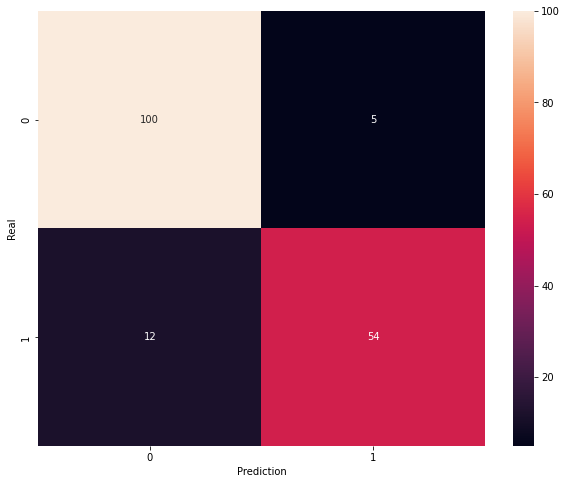

In [190]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd').set(xlabel = 'Prediction', ylabel = 'Real')

Here, 0 means that we have a benign cancer, and 1 means that we have a malign cancer. We have 105 benign cancer diagnosis, and we are getting the right prediction for 100 of those. Nice!

Also, we have 66 malign cancer diagnoses, and we are getting the right prediction for 54 of those. A high ratio, but not as high. 

Note that, in this problem, the accuracy is less important than the **recall**. The recall states the percentage of malign cancer diagnoses our model was able to identify.

## Test another feature selection method

Now, we will try to use another feature selection method, known as RFE. This is a recursive feature elimination algorithm. 

In [179]:
y = df_3.diagnostico
X = df_3.drop('diagnostico', axis = 1)

SEED = 1234
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

rfe_select = RFE(estimator = model_rndfor, n_features_to_select = 5, step = 1)
rfe_select.fit(X_train, y_train)

So, let's see which features the RFE ended up using:

In [181]:
cols = rfe_select.get_support(indices=True)
df_3.columns[cols]

Index(['exame_8', 'exame_9', 'exame_22', 'exame_25', 'exame_30'], dtype='object')

The same features as the Select K Best. Thats good! It means that our feature selection algorithms are converging towards the same features. Let's get the final training and test sets:

In [182]:
X_train_rfe = X_train.iloc[:,cols]
X_test_rfe  = X_test.iloc[:,cols]

Nice! Now, let's draw the confusion matrix for this case:

In [186]:
SEED = 1234
np.random.seed(SEED)

model_rndfor.fit(X_train_rfe, y_train)

acc = model_rndfor.score(X_test_rfe, y_test)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 90.06%


In [187]:
y_pred = model_rndfor.predict(X_test_rfe)

cm = confusion_matrix(y_test, y_pred)

[Text(69.0, 0.5, 'Real'), Text(0.5, 51.0, 'Prediction')]

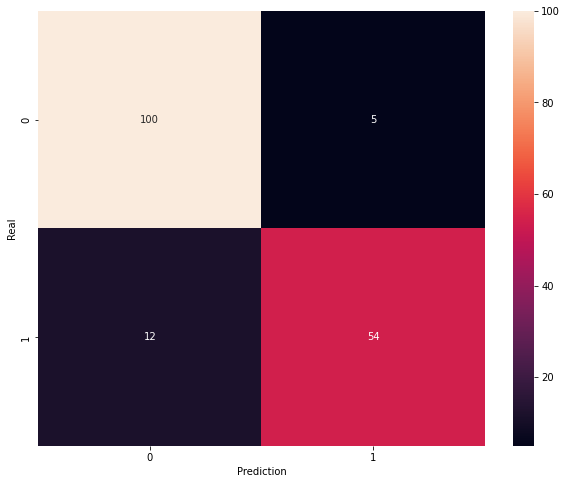

In [188]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd').set(xlabel = 'Prediction', ylabel = 'Real')

So, since we actually end up choosing the same features, the accuracy metrics and the confusion matrix are the same (we used the same seed as before).

Another method that we can use is the RFECV, which is very similar to the RFE, but uses a cross-validation approach. Thus, we can use:

In [193]:
y = df_3.diagnostico
X = df_3.drop('diagnostico', axis = 1)

SEED = 1234
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

rfecv_select = RFECV(estimator = model_rndfor, cv = 5, step = 1, scoring = "accuracy")
rfecv_select.fit(X_train, y_train)

RFECV(cv=5, estimator=RandomForestClassifier(), scoring='accuracy')

This time, our RFECV algorithm ended up choosing the following algorithms:

In [194]:
cols = rfecv_select.get_support(indices=True)
df_3.columns[cols]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_7', 'exame_8', 'exame_9',
       'exame_12', 'exame_14', 'exame_15', 'exame_22', 'exame_23', 'exame_25',
       'exame_27', 'exame_28', 'exame_30', 'exame_31'],
      dtype='object')

Note that, using the RFECV, we did not need to say the number of features we want in the end. Thus, here, the model ended up choosing 16 features. Let's train our model and get its accuracy using the following features:

In [197]:
X_train_rfecv = X_train.iloc[:,cols]
X_test_rfecv  = X_test.iloc[:,cols]

Nice! Now, let's draw the confusion matrix for this case:

In [198]:
SEED = 1234
np.random.seed(SEED)

model_rndfor.fit(X_train_rfecv, y_train)

acc = model_rndfor.score(X_test_rfecv, y_test)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 92.98%


Nice! Now, our accuracy was the same as using ```df_3``` directly, which had much more features. Let's draw our correlation matrix:

In [202]:
y_pred = model_rndfor.predict(X_test_rfecv)

cm = confusion_matrix(y_test, y_pred)

[Text(69.0, 0.5, 'Real'), Text(0.5, 51.0, 'Prediction')]

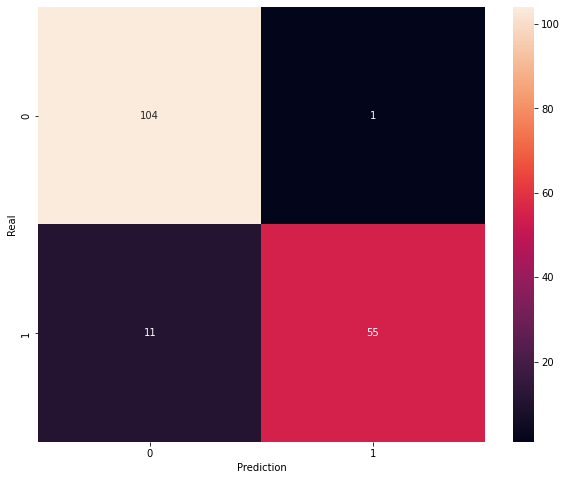

In [203]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, fmt = 'd').set(xlabel = 'Prediction', ylabel = 'Real')

Note that, now, our model was able to find almost all benign cancer diagnoses! Great. However, we still missed a couple of malign cancer diagnoses. 

# Visualizing results from high-dimensional data

We already saw that the confusion matrix can give us some information about the high dimensional data results, expressing some information about the true and false positives and true and false negatives. Let's see other approaches we can use to visualize our results from high-dimensional datasets.

First: we see that the RFECV showed the best result overall (even though it is also the most "expensive" one, in terms of computational time). But why did this approach chose 16 features? Why not more or less? Let's try to get the average accuracy for a different number of features:

In [210]:
avg_acc = rfecv_select.cv_results_['mean_test_score']
num_ftr = list(range(1, len(avg_acc)+1))

(0.88, 1.0)

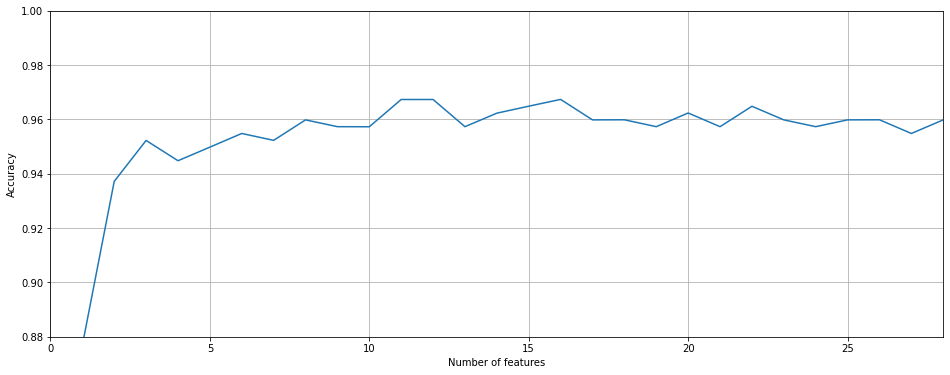

In [217]:
plt.figure(figsize = (16, 6))

plt.plot(num_ftr, avg_acc)

plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.grid( )

plt.xlim([0, 28])
plt.ylim([0.88, 1])

Note that, as we have more features, our accuracy changes very little. In fact, the higher accuracy is seem for 16 features, which is why the selector ended up choosing this number of features. Also, when we start to work with fewer features ($<10$), our accuracy starts to reduce very quickly.

Another interesting thing we can do is try to plot a scatter plot for our dataset, detailing the different diagnoses by a different color. However, to build a scatterplot, we need to have only 2 features. Thus, we can use a feature selection method to get the two most important features, and then plot a scatterplot:

In [220]:
select_k_best = SelectKBest(f_classif, k = 2) 

y = df_3.diagnostico
X = df_3.drop('diagnostico', axis = 1)

SEED = 1234
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

select_k_best.fit(X_train, y_train)

SelectKBest(k=2)

So, the best two columns are:

In [221]:
cols = select_k_best.get_support(indices=True)
df_3.columns[cols]

Index(['exame_9', 'exame_30'], dtype='object')

Now, let's make a new training and test set using only those features:

In [222]:
X_2best = X.iloc[:,cols]

In [224]:
X_2best.head( )

,exame_9,exame_30
0,2.532475,2.296076
1,0.548144,1.087084
2,2.037231,1.955000
3,1.451707,2.175786
4,1.428493,0.729259


Nice! Now, let's create a new dataframe, by merging this dataframe with the diagnosis feature:

In [225]:
df_4 = X_2best.merge(y, left_index = True, right_index = True)

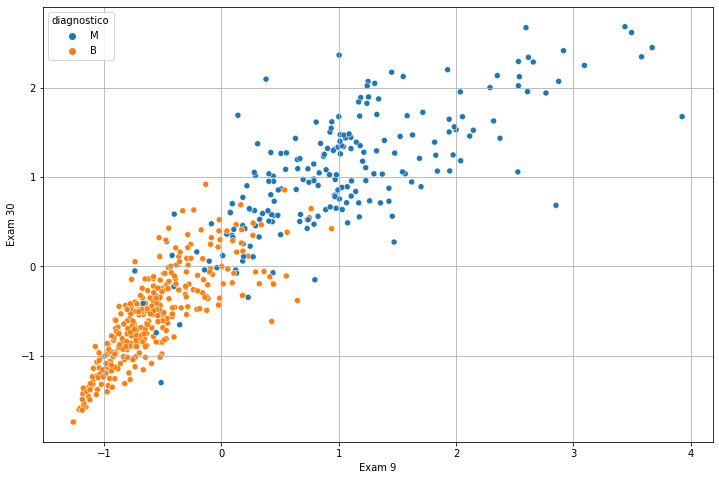

In [229]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'exame_9', y = 'exame_30', hue = 'diagnostico', data = df_4)
plt.xlabel("Exam 9")
plt.ylabel("Exam 30")

plt.grid( )

So, note that malign cancer diagnoses are very related to higher values for those two exams. That is a very interesting result. However, we are still losing a lot of information from the other features. After all, we saw that the accuracy for the model using only two features is much lower.

## Principal Component Analysis (PCA) and other methods

PCA makes a transformation on our features, so that our $n$ features are turned into $k$ features, which are combinations of our previous features. These $k$ features will ideally store most of the information from our previous $n$ features, while also allowing us to build a more robust model with a more simple dataset. 

To use PCA, we can do:

In [231]:
y = df_3.diagnostico
X = df_3.drop('diagnostico', axis = 1)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [232]:
X_pca

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148886],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

Now, we have a set of data reduced to two dimensions. Let's pass this to a dataframe, and then merge to our target feature to get another df:

In [233]:
X_pca = pd.DataFrame(X_pca, columns = ['FeaturePCA1', 'FeaturePCA2'])

In [235]:
df_5 = X_pca.merge(y, left_index = True, right_index = True)

Finally, let's build our scatter plot once again:

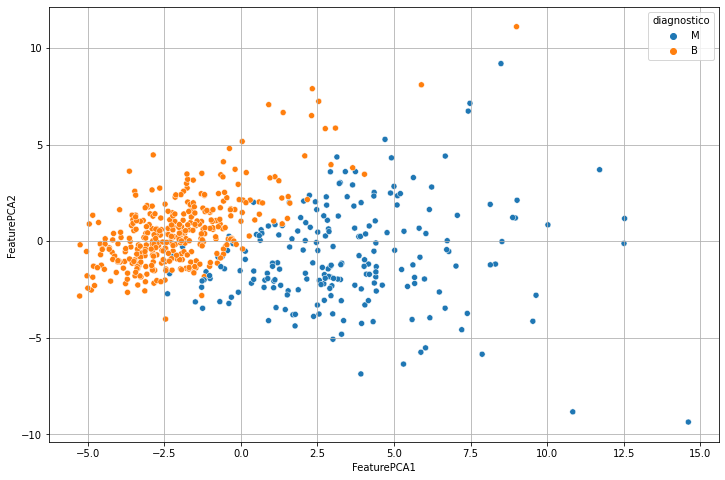

In [237]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'FeaturePCA1', y = 'FeaturePCA2', hue = 'diagnostico', data = df_5)

plt.grid( )

Now, our axis do not mean an exam in specific, but rather they are formed by the combination of multiple exams. Also, it is very clear, once again, the difference between our malign and benign cancer diagnoses. 

We can also try to do a similar thing using another method, the $t$-distributed Stochastic Neighbor Embedding (t-NSE):

In [242]:
y = df_3.diagnostico
X = df_3.drop('diagnostico', axis = 1)

tnse = TSNE(n_components = 2, init = 'pca', learning_rate = 'auto')
X_tnse = tnse.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [243]:
X_tnse = pd.DataFrame(X_tnse, columns = ['FeatureTNSE1', 'FeatureTNSE2'])

In [245]:
df_6 = X_tnse.merge(y, left_index = True, right_index = True)

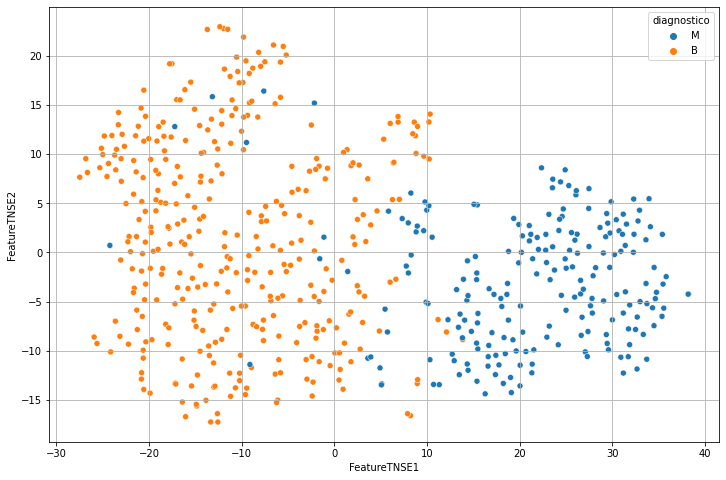

In [246]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'FeatureTNSE1', y = 'FeatureTNSE2', hue = 'diagnostico', data = df_6)

plt.grid( )

Using the TNSE, the separation of our dataset for different diagnoses becomes more clear!